In [1]:
%load_ext cudf.pandas
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/names-ss-1910-2022.csv.zip'
names = pd.read_csv(url, encoding='utf8')
names

,state,sex,year,name,count
0,ID,F,1910,Mary,53
1,ID,F,1910,Dorothy,31
2,ID,F,1910,Helen,30
3,ID,F,1910,Margaret,24
4,ID,F,1910,Ruth,24
...,...,...,...,...,...
6408036,SD,M,2022,Tristan,5
6408037,SD,M,2022,Tyson,5
6408038,SD,M,2022,Warren,5
6408039,SD,M,2022,Zayne,5


In [3]:
%%cudf.pandas.profile
start = time.time()
actor_names = [
    "Primrose", "Anakin", "Arwen", "Esme", "Amelie", "Keanu", "Kylo",
    "Coraline", "Leia", "Meadow", "Adele", "Elsa", "Augustus", 
    "Xander", "Maximus", "Arya", "Ariel", "Chandler", "Luna"
]

movies = [
    "The Hunger Games", "Star Wars", "The Lord of the Rings", "New Moon", 
    "Amelie", "John Wick", "Star Wars", "Coraline", "Star Wars: A New Hope",
    "The Sopranos", "21", "Frozen", "The Fault in Our Stars", 
    "Buffy the Vampire Slayer", "Gladiator", "Game of Thrones", 
    "The Little Mermaid", "Friends", "Harry Potter and the Order of the Phoenix"
]

years = [
    2012, 1999, 2001, 2006, 2001, 2014, 2015, 2009, 1977,
    1999, 2010, 2013, 2014, 1997, 2000, 2011, 1989, 1994, 2007
]

# Creating DataFrame
movie_names = pd.DataFrame({
    'Name': actor_names,
    'Movie': movies,
    'Year': years
})
movie_names

,Name,Movie,Year
0,Primrose,The Hunger Games,2012
1,Anakin,Star Wars,1999
2,Arwen,The Lord of the Rings,2001
3,Esme,New Moon,2006
4,Amelie,Amelie,2001
5,Keanu,John Wick,2014
6,Kylo,Star Wars,2015
7,Coraline,Coraline,2009
8,Leia,Star Wars: A New Hope,1977
9,Meadow,The Sopranos,1999


                                                                                                        
                                       Total time elapsed: 0.411 seconds                                
                                     2 GPU function calls in 0.022 seconds                              
                                     0 CPU function calls in 0.000 seconds                              
                                                                                                        
                                                     Stats                                              
                                                                                                        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function           ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ DataFrame          │ 1          │ 0.009       │ 0.009       │ 0          │ 0.000       │ 0.000       │
│ DataFrame.__repr__ │ 1          │ 0.013       │ 0.013       │ 0          │ 0.000       │ 0.000       │
└────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

<Axes: xlabel='year'>

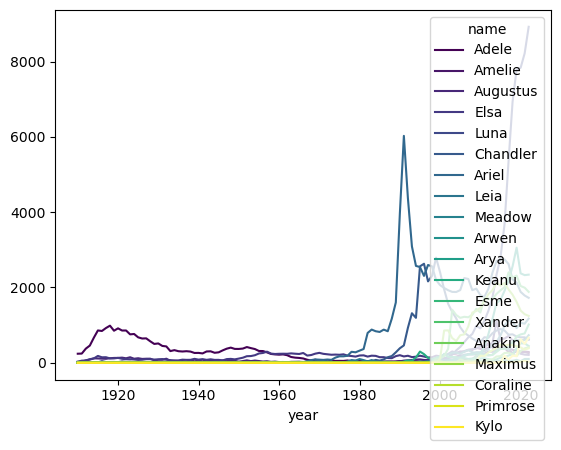

                                                                                                                  
                                            Total time elapsed: 1.709 seconds                                     
                                          5 GPU function calls in 0.377 seconds                                   
                                          3 CPU function calls in 0.358 seconds                                   
                                                                                                                  
                                                          Stats                                                   
                                                                                                                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                     ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ DataFrame.merge              │ 1          │ 0.072       │ 0.072       │ 0          │ 0.000       │ 0.000       │
│ DataFrame.groupby            │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ DataFrameGroupBy.__getitem__ │ 1          │ 0.100       │ 0.100       │ 0          │ 0.000       │ 0.000       │
│ GroupBy.sum                  │ 1          │ 0.104       │ 0.104       │ 0          │ 0.000       │ 0.000       │
│ Series.unstack               │ 0          │ 0.000       │ 0.000       │ 1          │ 0.021       │ 0.021       │
│ NDFrame.fillna               │ 1          │ 0.101       │ 0.101       │ 0          │ 0.000       │ 0.000       │
│ DataFrame                    │ 0          │ 0.000       │ 0.000       │ 1          │ 0.000       │ 0.000       │
│ PlotAccessor.__call__        │ 0          │ 0.000       │ 0.000       │ 1          │ 0.337       │ 0.337       │
└──────────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- Series.unstack
- DataFrame
- PlotAccessor.__call__

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=425705;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

In [4]:
%%cudf.pandas.profile
(names
 .merge(movie_names, left_on='name', right_on='Name', how='inner')
 .groupby(['year', 'name'])
 ['count']
 .sum()
 .unstack()
 .fillna(0)
 .plot(cmap='viridis')
)

4.701997518539429


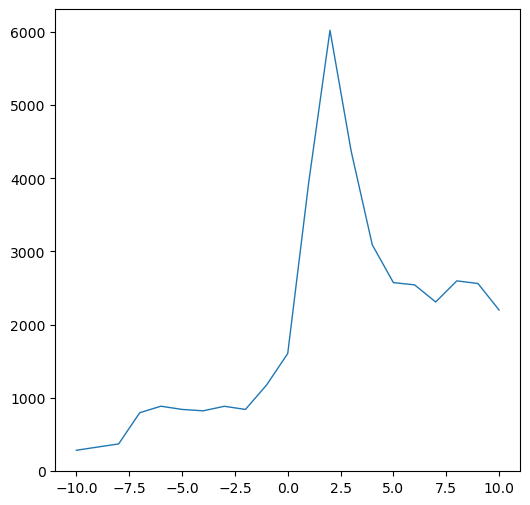

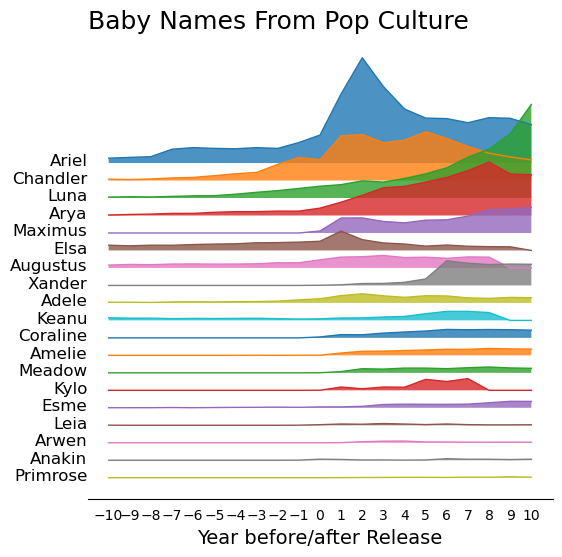

                                                                                                                  
                                            Total time elapsed: 4.035 seconds                                     
                                          8 GPU function calls in 0.368 seconds                                   
                                          4 CPU function calls in 2.392 seconds                                   
                                                                                                                  
                                                          Stats                                                   
                                                                                                                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                     ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ DataFrame.merge              │ 1          │ 0.017       │ 0.017       │ 0          │ 0.000       │ 0.000       │
│ DataFrame.assign             │ 1          │ 0.006       │ 0.006       │ 0          │ 0.000       │ 0.000       │
│ DataFrame.query              │ 0          │ 0.000       │ 0.000       │ 1          │ 1.985       │ 1.985       │
│ DataFrame.groupby            │ 1          │ 0.095       │ 0.095       │ 0          │ 0.000       │ 0.000       │
│ DataFrameGroupBy.__getitem__ │ 1          │ 0.012       │ 0.012       │ 0          │ 0.000       │ 0.000       │
│ GroupBy.sum                  │ 1          │ 0.098       │ 0.098       │ 0          │ 0.000       │ 0.000       │
│ Series.unstack               │ 0          │ 0.000       │ 0.000       │ 1          │ 0.013       │ 0.013       │
│ DataFrame.reindex            │ 1          │ 0.104       │ 0.104       │ 0          │ 0.000       │ 0.000       │
│ NDFrame.fillna               │ 1          │ 0.036       │ 0.036       │ 0          │ 0.000       │ 0.000       │
│ DataFrame                    │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ _LocationIndexer.__getitem__ │ 0          │ 0.000       │ 0.000       │ 1          │ 0.029       │ 0.029       │
│ NDFrame.pipe                 │ 0          │ 0.000       │ 0.000       │ 1          │ 0.364       │ 0.364       │
└──────────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- DataFrame.query
- Series.unstack
- _LocationIndexer.__getitem__
- NDFrame.pipe

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=735308;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

In [5]:
%%cudf.pandas.profile


def plot_fill(df_, factor=100, figsize=(8,3), alpha=.8):
    fig, ax = plt.subplots(figsize=figsize)
    for i, col in enumerate(df_.columns):
        ax.plot(df_.index, df_[col] + (i*factor), linewidth=1)
        ax.fill_between(df_.index, y1=[(i*factor)] * len(df_), y2=df_[col] + (i*factor), alpha=alpha)
        # add name (movie to the left)
        ax.text(df_.index[0] -1, (i*factor) + 100, col, fontsize=12, ha='right', va='center')

    # remove spines
    for side in ['right', 'top', 'left']:
        ax.spines[side].set_visible(False)

    # remove ticks
    ax.tick_params(axis='both', which='both', bottom=False, left=False)
    ax.set_yticks([])

    # set xticks
    ax.set_xticks(range(-10,11))
    ax.set_title('Baby Names From Pop Culture', loc='left', fontsize=18)
    ax.set_xlabel('Year before/after Release', fontsize=14)
    return df_

(names
 .merge(movie_names, left_on='name', right_on='Name', how='inner')
 .assign(year_offset=lambda df_: df_.year - df_.Year)
 .query('year_offset >= -10 and year_offset <= 10')
 .groupby(['year_offset', 'name'])
 ['count']
 .sum()
 .unstack()
 .reindex(range(-10,11))
 .fillna(0)
 # sort columns by sum of columns
 .loc[:, lambda df_: df_.sum().sort_values(ascending=False).index]
 .pipe(plot_fill, factor=-1000, figsize=(6,6))
)

end = time.time() - start
print(end)